In [1]:
# Import Required modules
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Statistics

Mean:

$μ = \frac{\sum_{i=1}^n x_i}{ n}$

Median:



### dnorm

As we all know the probability density for the normal distribution is:

$f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$


The function dnorm returns the value of the probability density function for the normal distribution given parameters for x
, μ
, and σ
. Some examples of using dnorm are below:

> It gives the height of the curve at a given point on x

### Equivalence between distribution functions in R and Python

| R |	SciPy |	Name |
| --- | --- | --- |
|dnorm()	|pdf()	|Probability density function (PDF)|
|pnorm()	|cdf()	|Cumulative density function (CDF)|
|qnorm()	|ppf()	|Percentile point function (CDF inverse)|
|pnorm(lower.tail = FALSE)	| sf()	|Complementary CDF (CCDF) or survival |function
|qnorm(lower.tail = FALSE)	| isf()	|CCDF inverse or inverse survival function|
|rnorm()	|rvs()	|Random samples|

In [2]:
stats.norm.pdf(0, 0, 1)

0.3989422804014327

In [3]:
stats.norm.pdf(1, 0, 1)

0.24197072451914337

In [4]:
stats.norm.pdf(-1, 0, 1)

0.24197072451914337

### pnorm
The function pnorm returns the integral from −∞
 to q
 of the pdf of the normal distribution where q
 is a Z-score. Try to guess the value of pnorm(0). (pnorm has the same default mean and sd arguments as dnorm).

In [5]:
# To be clear about the arguments in this example:
# q = 0, mean = 0, sd = 1
stats.norm.cdf(0)

0.5

In [6]:
stats.norm.cdf(1)

0.8413447460685429

In [7]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [8]:
# Get area under curve from left to right
stats.norm.cdf(2, 5, 3)

0.15865525393145707

In [9]:
# Get area under curver from right to left by subtracting from 1
display(1 - stats.norm.cdf(2, 5, 3))
display(stats.norm.sf(2, 5, 3))

0.8413447460685429

0.8413447460685429

### qnorm
The qnorm function is simply the inverse of the cdf, which you can also think of as the inverse of pnorm! You can use qnorm to determine the answer to the question: What is the Z-score of the pth
 quantile of the normal distribution?

In [10]:
display(stats.norm.ppf(0.5))
display(stats.norm.ppf(1))
display(stats.norm.ppf(.84))

0.0

inf

0.994457883209753

In [11]:
# The reverse of ppf
stats.norm.isf(0.84)

-0.994457883209753

### rnorm
If you want to generate a vector of normally distributed random numbers, rnorm is the function you should use. The first argument n is the number of numbers you want to generate, followed by the standard mean and sd arguments. Let’s illustrate the weak law of large numbers using rnorm.

In [12]:
stats.norm.rvs(0)

-0.35736712851678304

## Descriptive statistics


In [13]:
import pandas as pd

afl_finalists = pd.read_csv(
    'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv')
afl_margins = pd.read_csv(
    'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv')

In [14]:
display(afl_finalists.head())
display(afl_margins.head())

,afl.finalists
0,Hawthorn
1,Melbourne
2,Carlton
3,Melbourne
4,Hawthorn


,afl.margins
0,56
1,31
2,56
3,8
4,32


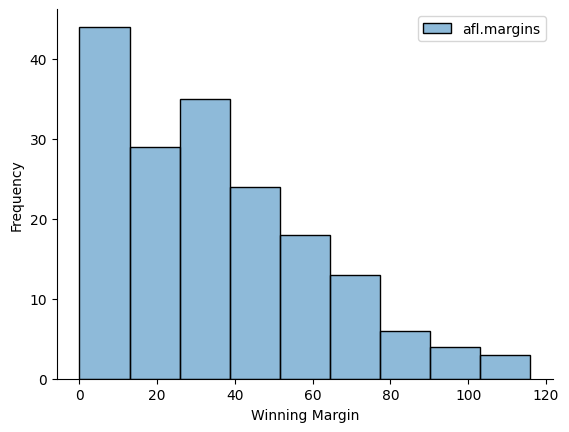

In [15]:

ax = sns.histplot(afl_margins)

ax.set(xlabel="Winning Margin", ylabel="Frequency")

sns.despine()

In [16]:
afl_finalists["afl.finalists"].unique()

array(['Hawthorn', 'Melbourne', 'Carlton', 'Essendon', 'Geelong',
       'Collingwood', 'West Coast', 'St Kilda', 'Western Bulldogs',
       'Adelaide', 'North Melbourne', 'Richmond', 'Brisbane', 'Sydney',
       'Port Adelaide', 'Fremantle'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Hawthorn'),
  Text(1, 0, 'Melbourne'),
  Text(2, 0, 'Carlton'),
  Text(3, 0, 'Essendon'),
  Text(4, 0, 'Geelong'),
  Text(5, 0, 'Collingwood'),
  Text(6, 0, 'West Coast'),
  Text(7, 0, 'St Kilda'),
  Text(8, 0, 'Western Bulldogs'),
  Text(9, 0, 'Adelaide'),
  Text(10, 0, 'North Melbourne'),
  Text(11, 0, 'Richmond'),
  Text(12, 0, 'Brisbane'),
  Text(13, 0, 'Sydney'),
  Text(14, 0, 'Port Adelaide'),
  Text(15, 0, 'Fremantle')])

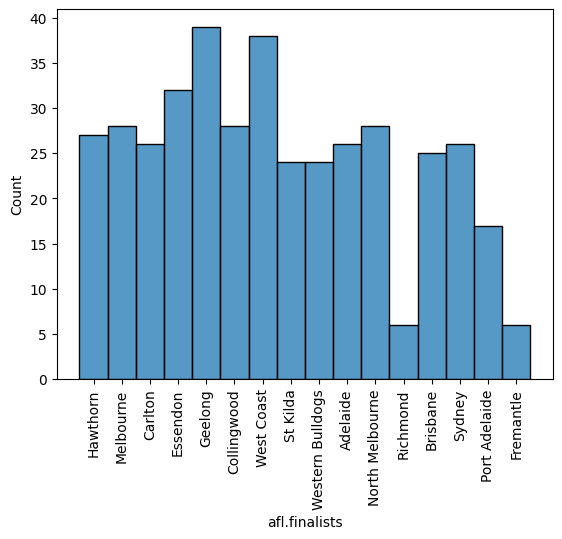

In [17]:
g = sns.histplot(afl_finalists["afl.finalists"])
plt.xticks(rotation=90)

<Axes: xlabel='afl.finalists'>

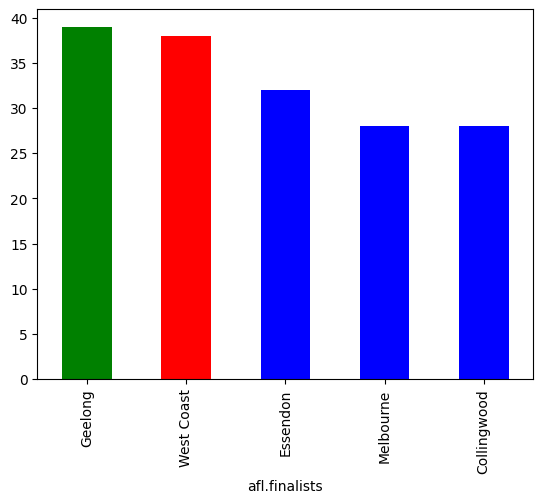

In [18]:
display(afl_finalists["afl.finalists"].value_counts().head().plot(
    kind="bar", color=["green", "red"] + ["blue" for x in range(16)]))

<Axes: ylabel='afl.finalists'>

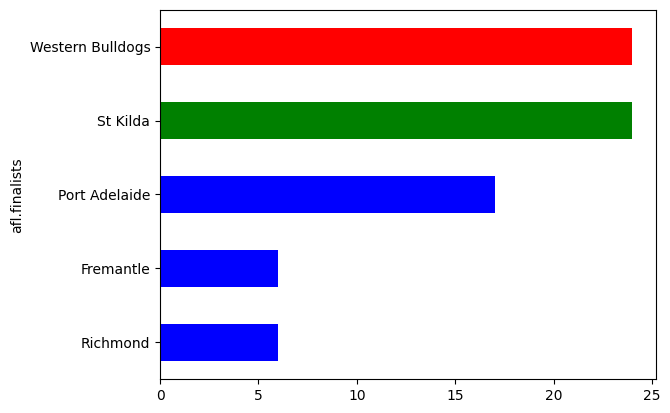

In [19]:
display(afl_finalists["afl.finalists"].value_counts().sort_values().head().plot(
    kind="barh", color=["blue" for x in range(3)] + ["green", "red"]))

In [20]:
afl_margins["afl.margins"].unique

<bound method Series.unique of 0      56
1      31
2      56
3       8
4      32
       ..
171    28
172    38
173    29
174    10
175    10
Name: afl.margins, Length: 176, dtype: int64>

In [21]:
display(afl_margins.describe())

,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


In [22]:
display(afl_margins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   afl.margins  176 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


None

<Axes: >

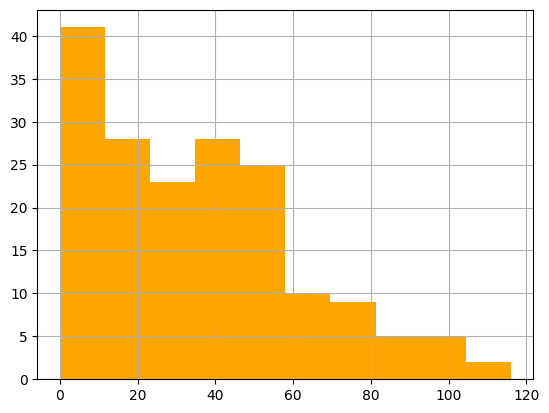

In [23]:
afl_margins["afl.margins"].hist(color="orange")

### nterquartile range

In [24]:
import statistics
display(
    "Mean => ",
    statistics.mean(afl_margins["afl.margins"]),
    "Median => ",
    statistics.median(afl_margins["afl.margins"]))

'Mean => '

35.30113636363637

'Median => '

30.5

In [25]:
stats.trim_mean(afl_margins["afl.margins"], 0.05)

33.75

In [26]:
margins = afl_margins["afl.margins"]
np.quantile(margins,  [0.24, 0.75])

array([12. , 50.5])

In [27]:
stats.iqr(margins)

37.75

In [28]:
display(statistics.variance(margins), statistics.stdev(margins))


679.834512987013

26.073636359108274

In [29]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
parenthood = pd.read_csv(file)

In [30]:
display(parenthood.head(), parenthood.describe())

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


,dan_sleep,baby_sleep,dan_grump,day
count,100.000000,100.000000,100.00000,100.000000
mean,6.965200,8.049200,63.71000,50.500000
std,1.015884,2.074232,10.04967,29.011492
min,4.840000,3.250000,41.00000,1.000000
25%,6.292500,6.425000,57.00000,25.750000
50%,7.030000,7.950000,62.00000,50.500000
75%,7.740000,9.635000,71.00000,75.250000
max,9.000000,12.070000,91.00000,100.000000


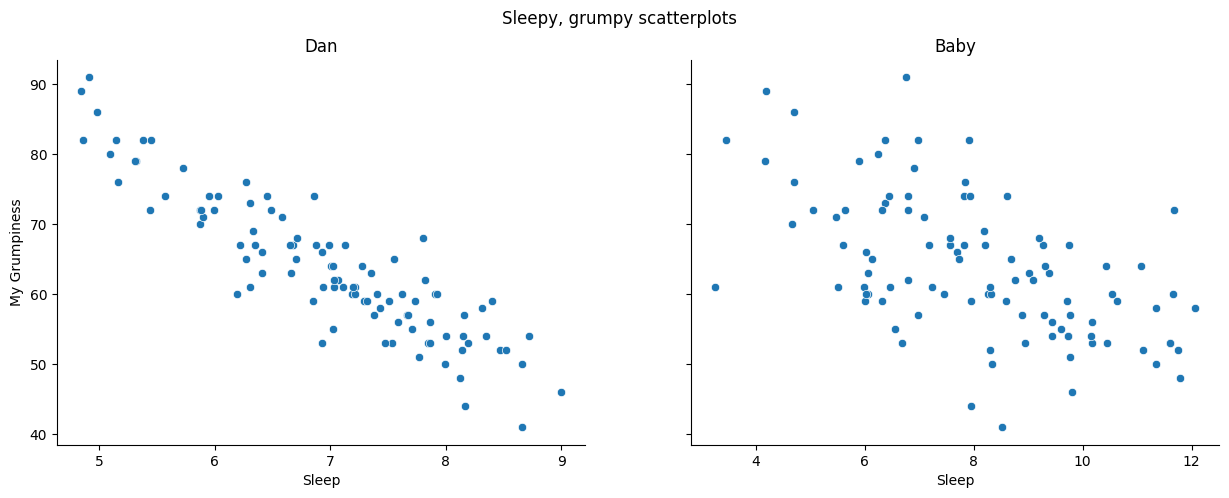

In [31]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("Sleepy, grumpy scatterplots")

sns.scatterplot(x= "dan_sleep", y = "dan_grump", ax = axes[0], data=parenthood)
fig.axes[0].set_title("Dan")
fig.axes[0].set_xlabel("Sleep")
fig.axes[0].set_ylabel("My Grumpiness")

sns.scatterplot(x = "baby_sleep", y = "dan_grump", ax = axes[1], data=parenthood)
fig.axes[1].set_title("Baby")
fig.axes[1].set_xlabel("Sleep")
# fig.axes[1].set_ylabel("My Grumpiness")
sns.despine()

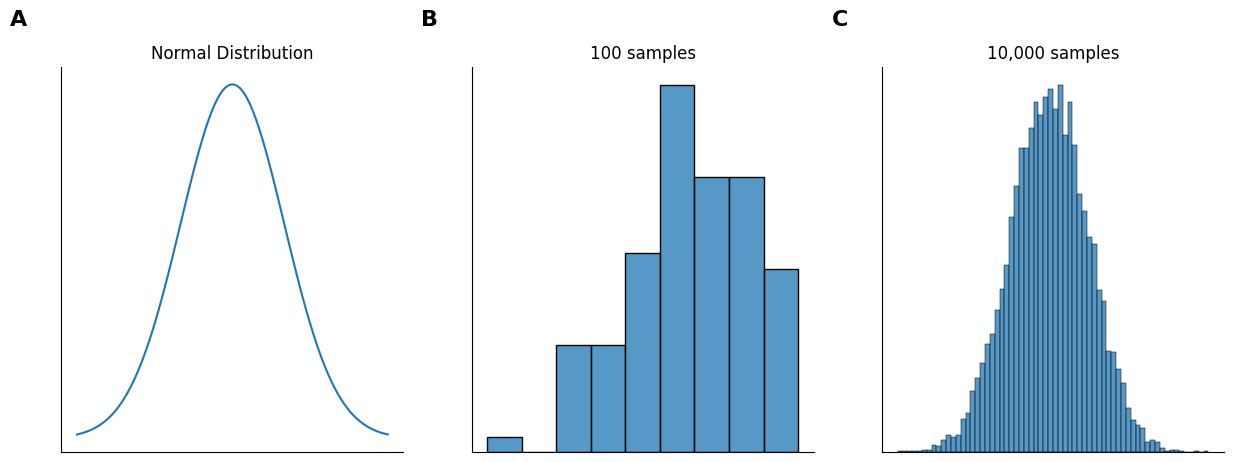

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

# arrange a grid of three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# plot normal distribution
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax0 = sns.lineplot(x=x,y=y, ax=axes[0])

# plot histogram of 100 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=100)
ax1 = sns.histplot(IQ, ax=axes[1])

# plot histogram of 10000 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=10000)
ax2 = sns.histplot(IQ,ax=axes[2])

# add titles, labels, and formatting
labels = ['A', 'B', 'C']
titles = ['Normal Distribution', '100 samples', '10,000 samples']
for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.text(-0.1, 1.15, labels[i], transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(axis='both', 
                   which='both',
                   bottom=False,
                   left=False)

# remove top and bottom spines
sns.despine()

## Linear regression